# k-Nearest Neighbors
### python datascience handbook
Let’s quickly see how we might use this argsort function along multiple axes to find the nearest neighbors of each point in a set.

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

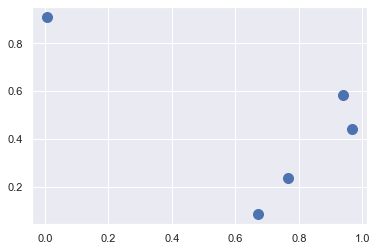

In [12]:
import random
import numpy as np

random.seed(1234)
X = np.array([random.random() for i in range(10)])
X = X.reshape(5,2)
plt.scatter(X[:, 0], X[:, 1], s=100);

- for each pair of points, compute differences in their coordinates : X[:, np.newaxis, :] - X[np.newaxis, :, :]
- square the coordinate differences : differences ** 2
- sum the coordinate differences to get the squared distance np.sum(```, axis=-1)

In [19]:
import pandas as pd
pd.DataFrame(X, index = ['a','b','c','d','e'], columns =['x1', 'x2'])

,x1,x2
a,0.966454,0.440733
b,0.007491,0.910976
c,0.939269,0.582228
d,0.671563,0.083938
e,0.766481,0.236810


## 1. Data representations for neural networks
### multidimensional Numpy arrays, also called tensors.
- At its core, a tensor is a container for data—almost always numerical data. 
- So, it’s a container for numbers You may be already familiar with matrices, which are 2D tensors:
 * tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).

### 1.0 Scalars (0D tensors)
A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor). In Numpy, a float32 or float64 number is a scalar tensor (or scalar array). You can display the number of axes of a Numpy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank.

In [28]:
x = np.array(12)
x
x.ndim

array(12)

0

### 1.1 Vectors (1D tensors)

An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis. Following is a Numpy vector:

In [30]:
x = np.array([12, 3, 6, 14])
x
x.ndim

array([12,  3,  6, 14])

1

This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its
axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). Dimensionality can denote either the number of entries along a specific
axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. In the latter case, it’s technically more
correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless.

In [33]:
x.reshape(-1,1)
x.reshape(-1,1).shape
x.reshape(-1,1).ndim

array([[12],
       [ 3],
       [ 6],
       [14]])

(4, 1)

2

## 1.2 Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers.
This is a Numpy matrix:

In [35]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x
x.shape
x.ndim

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

(3, 5)

2

The entries from the first axis are called the rows, and the entries from the second axis are called the columns. In the previous example, [5, 78, 2, 34, 0] is the first row of x,
and [5, 6, 7] is the first column.

## 1.3 3D tensors and higher-dimensional tensors
If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. Following is a Numpy 3D tensor:

In [37]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x
x.shape
x.ndim

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

(3, 3, 5)

3

A tensor is defined by three key attributes:
- Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.
- Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape
(3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
- Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8,
float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors
live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation

To make this more concrete, let’s look back at the data we processed in the MNIST example. First, we load the MNIST dataset:

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

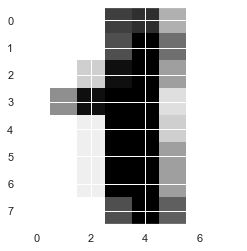

In [52]:
digit = digits.images[1]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 8 x 8 픽셀의 instance가 1,797개가 존재하는 3d tensor

In [55]:
digits.images[1]
digits.images[1].ndim
digits.images[1].shape

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

2

(8, 8)

In [46]:
print(digits.images.shape)

(1797, 8, 8)


In [47]:
print(digits.images.shape)

(1797, 8, 8)


In [96]:
## 직접 만들어 보기

In [97]:
x = np.array([1,2])
x
x.shape
x.ndim

array([1, 2])

(2,)

1

In [98]:
x = np.array([
    [11,12], 
    [21,22]
])
x
x.shape
x.ndim

array([[11, 12],
       [21, 22]])

(2, 2)

2

## <font color='red'> 처음 '['에 2개 원소가, 그 다음 '['에 3개, 그 다음 '['에 2개 그래서 (2,3,2) shape이고 '['가 3번 나타나니 3d

In [111]:
x = np.array([
    [
        [111, 112], [121, 122], [131, 132] 
    ], 
    
    [
        [211, 212], [221, 222], [231, 232]
    ]
])
x
x.shape
x.ndim

array([[[111, 112],
        [121, 122],
        [131, 132]],

       [[211, 212],
        [221, 222],
        [231, 232]]])

(2, 3, 2)

3

In [108]:
array([[[0.96645354, 0.4407326 ],
        [0.00749147, 0.91097596],
        [0.939269  , 0.58222757],
        [0.67156348, 0.08393823],
        [0.76648093, 0.23680978]]])

array([[[111, 112],
        [121, 122],
        [131, 132]],

       [[211, 212],
        [221, 222],
        [231, 232]]])

(2, 3, 2)

3

In [112]:
np.array([1])
np.array([1]).shape
np.array([[1]])
np.array([[1]]).shape
np.array([[[1]]])
np.array([[[1]]]).shape

array([1])

(1,)

array([[1]])

(1, 1)

array([[[1]]])

(1, 1, 1)

## Back to k-Nearest Neighbors

In [113]:
X[:,np.newaxis,:]
X[:,np.newaxis,:].shape
X[:,np.newaxis,:].ndim
print('*'*100)
X[np.newaxis,:,:]
X[np.newaxis,:,:].shape
X[np.newaxis,:,:].ndim

array([[[0.96645354, 0.4407326 ]],

       [[0.00749147, 0.91097596]],

       [[0.939269  , 0.58222757]],

       [[0.67156348, 0.08393823]],

       [[0.76648093, 0.23680978]]])

(5, 1, 2)

3

****************************************************************************************************


array([[[0.96645354, 0.4407326 ],
        [0.00749147, 0.91097596],
        [0.939269  , 0.58222757],
        [0.67156348, 0.08393823],
        [0.76648093, 0.23680978]]])

(1, 5, 2)

3

## numpy broadcasting 에 따라 계산

In [114]:
X[:,np.newaxis,:] - X[np.newaxis,:,:]
(X[:,np.newaxis,:] - X[np.newaxis,:,:]).shape

array([[[ 0.        ,  0.        ],
        [ 0.95896207, -0.47024336],
        [ 0.02718454, -0.14149497],
        [ 0.29489005,  0.35679437],
        [ 0.1999726 ,  0.20392282]],

       [[-0.95896207,  0.47024336],
        [ 0.        ,  0.        ],
        [-0.93177753,  0.32874839],
        [-0.66407201,  0.82703774],
        [-0.75898946,  0.67416619]],

       [[-0.02718454,  0.14149497],
        [ 0.93177753, -0.32874839],
        [ 0.        ,  0.        ],
        [ 0.26770552,  0.49828935],
        [ 0.17278806,  0.3454178 ]],

       [[-0.29489005, -0.35679437],
        [ 0.66407201, -0.82703774],
        [-0.26770552, -0.49828935],
        [ 0.        ,  0.        ],
        [-0.09491745, -0.15287155]],

       [[-0.1999726 , -0.20392282],
        [ 0.75898946, -0.67416619],
        [-0.17278806, -0.3454178 ],
        [ 0.09491745,  0.15287155],
        [ 0.        ,  0.        ]]])

(5, 5, 2)

In [120]:
np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=0)

array([[1.04729643, 0.41003639],
       [2.80487424, 1.46769579],
       [0.97047032, 0.49570206],
       [0.60862735, 1.08295562],
       [0.65491908, 0.63876773]])

In [121]:
np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=1)

array([[1.04729643, 0.41003639],
       [2.80487424, 1.46769579],
       [0.97047032, 0.49570206],
       [0.60862735, 1.08295562],
       [0.65491908, 0.63876773]])

In [122]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=2)
dist_sq

array([[0.        , 1.14073706, 0.02075983, 0.21426237, 0.08157356],
       [1.14073706, 0.        , 0.97628486, 1.12498305, 1.03056505],
       [0.02075983, 0.97628486, 0.        , 0.31995852, 0.14916917],
       [0.21426237, 1.12498305, 0.31995852, 0.        , 0.03237903],
       [0.08157356, 1.03056505, 0.14916917, 0.03237903, 0.        ]])

In [123]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq

array([[0.        , 1.14073706, 0.02075983, 0.21426237, 0.08157356],
       [1.14073706, 0.        , 0.97628486, 1.12498305, 1.03056505],
       [0.02075983, 0.97628486, 0.        , 0.31995852, 0.14916917],
       [0.21426237, 1.12498305, 0.31995852, 0.        , 0.03237903],
       [0.08157356, 1.03056505, 0.14916917, 0.03237903, 0.        ]])

In [124]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 4 3 1]
 [1 2 4 3 0]
 [2 0 4 3 1]
 [3 4 0 2 1]
 [4 3 0 2 1]]


In [125]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1) # 순서에 상관없이 작은 숫자 2개를 뽑는다.
nearest_partition

array([[0, 2, 4, 3, 1],
       [1, 2, 4, 3, 0],
       [2, 0, 4, 3, 1],
       [3, 4, 0, 2, 1],
       [3, 4, 0, 2, 1]], dtype=int64)

Text(0.5, 1.0, 'Visualization of the neighbors of each point')

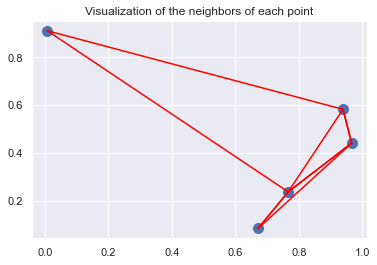

In [126]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        #plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='red')
        
plt.title('Visualization of the neighbors of each point')

## scikit-learn을 사용

In [127]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
X = np.array([[-3, -2], [-2, -1], [-1, -1], [1, 1], [2, 1], [3, 2]])
pd.DataFrame(X)

,0,1
0,-3,-2
1,-2,-1
2,-1,-1
3,1,1
4,2,1
5,3,2


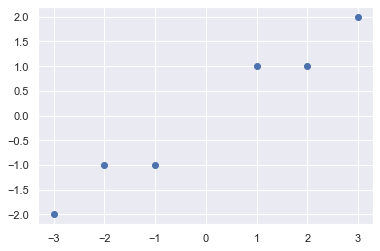

In [128]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [129]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [130]:
indices

array([[0, 1, 2],
       [1, 2, 0],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)

In [131]:
np.sqrt(2)
np.sqrt(5)

1.4142135623730951

2.23606797749979

In [132]:
distances

array([[0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

In [133]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

## Broadcasting
Arrays with different sizes cannot be added, subtracted, or generally be used in arithmetic.
A way to overcome this is to duplicate the smaller array so that it is the dimensionality and size as the larger array. This is called array broadcasting and is available in NumPy when performing array arithmetic, which can greatly reduce and simplify your code.
- https://machinelearningmastery.com/broadcasting-with-numpy-arrays/

<font color = 'red'> example in example regards to numpy broadcasting

In [134]:
a = np.arange(6).reshape((3, 2))
b = np.arange(3).reshape(-1,1)
a
b

array([[0, 1],
       [2, 3],
       [4, 5]])

array([[0],
       [1],
       [2]])

In [135]:
a[:,np.newaxis,:]; a[:,np.newaxis,:].shape

array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]])

(3, 1, 2)

In [136]:
a[np.newaxis,:,:]; a[np.newaxis,:,:].shape

array([[[0, 1],
        [2, 3],
        [4, 5]]])

(1, 3, 2)

(1,2)크기의 3개(sample 수라고 생각, a shape은 (3,1,2))있는 3차원 행렬 a에 (1,3,2)크기를 더하려면 ---> (1,2)크기를 broadcating을 샘플 수만큼하여 가감

(0,1)
(0,1)
(0,1)  + array([[[0, 1],
        [2, 3],
        [4, 5]]])
        
(2,3)
(2,3)
(2,3)  + array([[[0, 1],
        [2, 3],
        [4, 5]]])
        
(4,5)
(5,5)
(4,5)  + array([[[0, 1],
        [2, 3],
        [4, 5]]])

In [137]:
a[:,np.newaxis,:] + a[np.newaxis,:,:]

array([[[ 0,  2],
        [ 2,  4],
        [ 4,  6]],

       [[ 2,  4],
        [ 4,  6],
        [ 6,  8]],

       [[ 4,  6],
        [ 6,  8],
        [ 8, 10]]])